In [97]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import pearsonr
from skimage.filters import threshold_otsu
from skimage import filters, measure, segmentation, morphology
import tifffile as tf
plt.rcParams.update({'font.size': 16})

In [75]:
folder = '/Users/cuenca/Documents/Predoc Course/Pics/s3'

ch1 = glob.glob(folder + '/C1*.tif') 
ch2 = glob.glob(folder + '/C2*.tif') 
data1 = glob.glob(folder + '/ValuesC1*.csv') 
data2 = glob.glob(folder + '/ValuesC2*.csv') 

In [76]:
ch1 = tf.imread(ch1)
ch2 = tf.imread(ch2)
bl1 = pd.read_csv(data1[0])['Y'].values
bl2 = pd.read_csv(data2[0])['Y'].values

In [220]:
bln1 = bl1/bl1[0]
bln2 = bl2/bl2[0]


chn1, chn2 = [], []
for i, c in enumerate(ch1):
    chn1.append(c/bln1[i])
    chn2.append(ch2[i]/bln2[i])



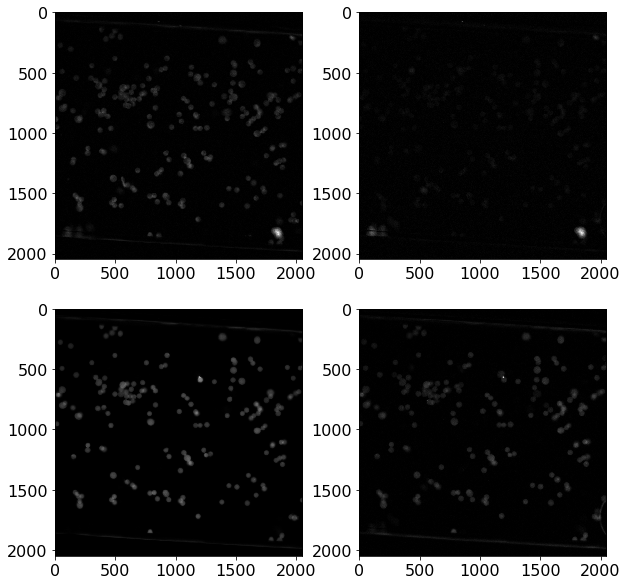

In [221]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.subplot(221)
plt.imshow(chn1[0], 'gray')

plt.subplot(222)
plt.imshow(chn1[-1], 'gray')

plt.subplot(223)
plt.imshow(chn2[0], 'gray')

plt.subplot(224)
plt.imshow(chn2[-1], 'gray')
plt.show()

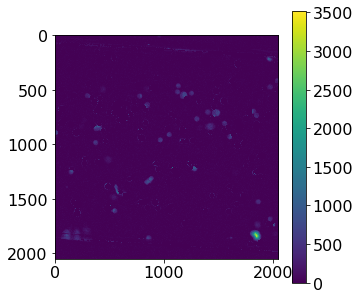

In [222]:
subs = chn1[0]/np.mean(np.mean(chn1[0]))-chn2[0]/np.mean(np.mean(chn2[0]))
bin_neg = subs >= 0
neg = bin_neg*chn1[0]
plt.rcParams["figure.figsize"] = [5, 5]
plt.imshow(neg, vmin=0)
plt.colorbar()
plt.show()

In [223]:

threshold_global_otsu = threshold_otsu(neg)
global_otsu = neg >= threshold_global_otsu


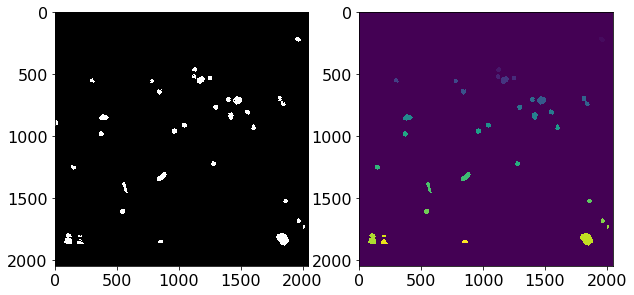

In [224]:
d = morphology.remove_small_objects(global_otsu, 250)
e = morphology.closing(d, morphology.disk(5))
cleared = segmentation.clear_border(e)
label_img = morphology.label(cleared, connectivity=cleared.ndim)
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(121)
plt.imshow(d, 'gray')
plt.subplot(122)
plt.imshow(label_img)
plt.show()

In [225]:
mean_i = []
for c in chn2:
    reg = measure.regionprops(label_img, c)
    i=[]
    for j, region in enumerate(reg):
        i.append(region.mean_intensity)
    mean_i.append(i)
        

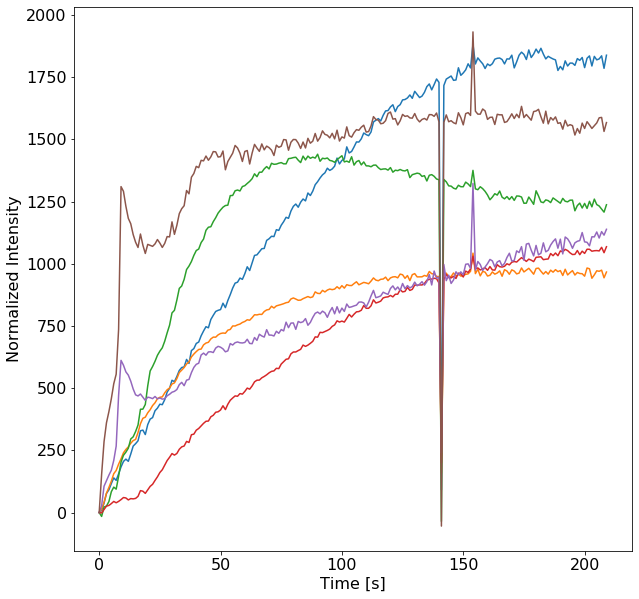

In [249]:
rs_meani = [list(x) for x in zip(*mean_i)]
index, coord = [], []
duration = 5*len(chn1)*60
time = np.arange(0, duration, 5*60)

profiles = []
for j, a in enumerate(rs_meani):
    
    if np.max(a-a[0])<2000 and a[100]-a[0]>500:
        index.append(j)
        coord.append(reg[j].centroid)
        plt.plot(a-a[0])
        profiles.append(a-a[0])
#plt.ylim((0,15))
#plt.xlim((0,20))
plt.xlabel('Time [s]')
plt.ylabel('Normalized Intensity')
plt.show()

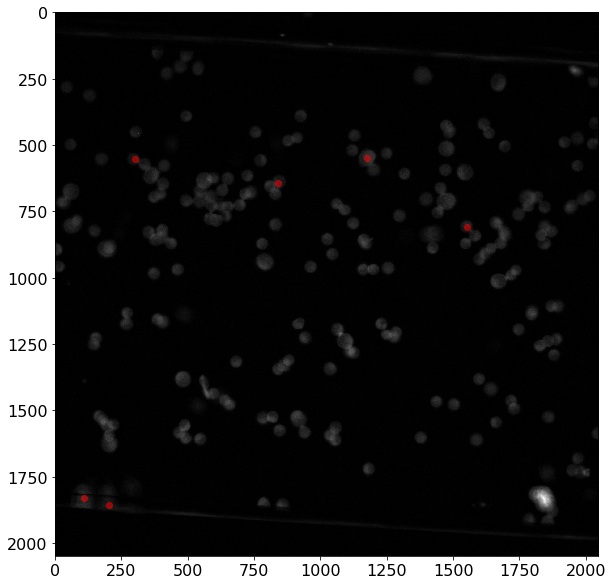

[(547.4145913714486, 1173.929849175728),
 (552.1931818181819, 301.3626033057851),
 (641.303559435863, 841.4479516453996),
 (807.1013094417643, 1550.908339076499),
 (1831.0802278661286, 107.85687158794208),
 (1854.9410239792612, 202.62605314322747)]

In [250]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.imshow(chn1[0], 'gray')
for cor in coord:
    plt.plot(cor[1], cor[0], 'or', alpha = 0.5)
plt.show()
coord

In [251]:
def recovery(x, amp, tau, y0):
    return amp*(1-np.exp(-x*tau))+y0

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 210
    # variables        = 3
    chi-square         = 3006950.01
    reduced chi-square = 14526.3286
    Akaike info crit   = 2015.55915
    Bayesian info crit = 2025.60048
[[Variables]]
    amp:  2195.22466 +/- 39.5244617 (1.80%) (init = 2)
    tau:  3.7224e-05 +/- 2.0884e-06 (5.61%) (init = 0)
    y0:  -72.9598167 +/- 31.2756329 (42.87%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau, y0)  = -0.714
    C(amp, tau) = -0.548
    C(amp, y0)  = -0.150


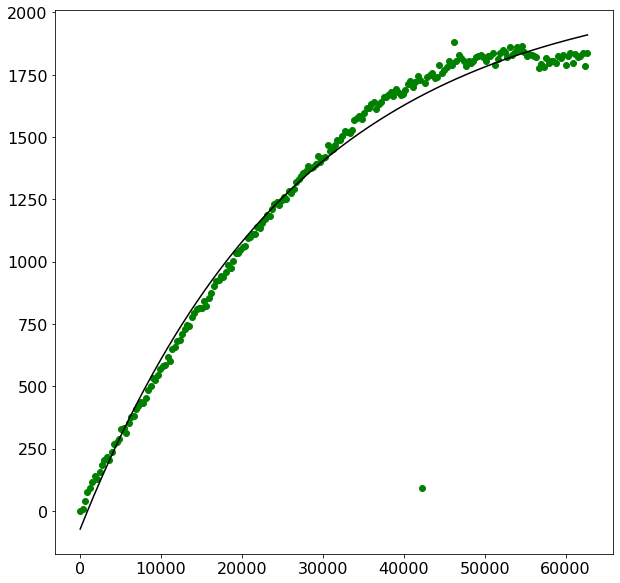

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 72
    # data points      = 210
    # variables        = 3
    chi-square         = 651732.899
    reduced chi-square = 3148.46811
    Akaike info crit   = 1694.45934
    Bayesian info crit = 1704.50066
[[Variables]]
    amp:  971.212963 +/- 17.8287574 (1.84%) (init = 2)
    tau:  8.8384e-05 +/- 3.3149e-06 (3.75%) (init = 0)
    y0:  -0.93475356 +/- 18.7875758 (2009.90%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, y0)  = -0.931
    C(tau, y0)  = -0.691
    C(amp, tau) =  0.453


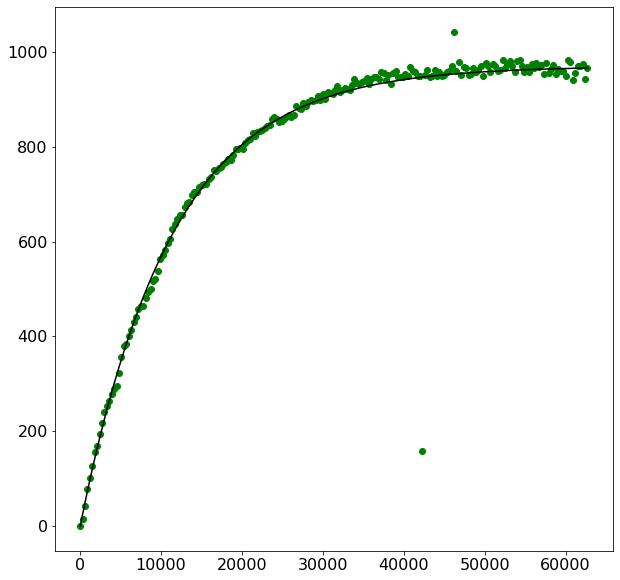

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 210
    # variables        = 3
    chi-square         = 3673904.90
    reduced chi-square = 17748.3328
    Akaike info crit   = 2057.62821
    Bayesian info crit = 2067.66953
[[Variables]]
    amp:  1632.50585 +/- 52.5774788 (3.22%) (init = 2)
    tau:  1.4106e-04 +/- 7.7787e-06 (5.51%) (init = 0)
    y0:  -290.551156 +/- 53.7725299 (18.51%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, y0)  = -0.973
    C(tau, y0)  = -0.684
    C(amp, tau) =  0.573


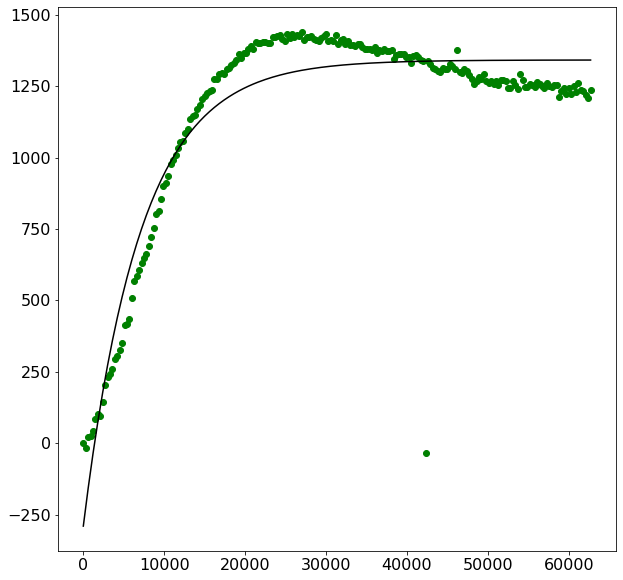

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 210
    # variables        = 3
    chi-square         = 660392.702
    reduced chi-square = 3190.30291
    Akaike info crit   = 1697.23131
    Bayesian info crit = 1707.27263
[[Variables]]
    amp:  1359.83807 +/- 23.6000775 (1.74%) (init = 2)
    tau:  3.1887e-05 +/- 1.5852e-06 (4.97%) (init = 0)
    y0:  -90.3140170 +/- 14.2055839 (15.73%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, tau) = -0.734
    C(tau, y0)  = -0.718


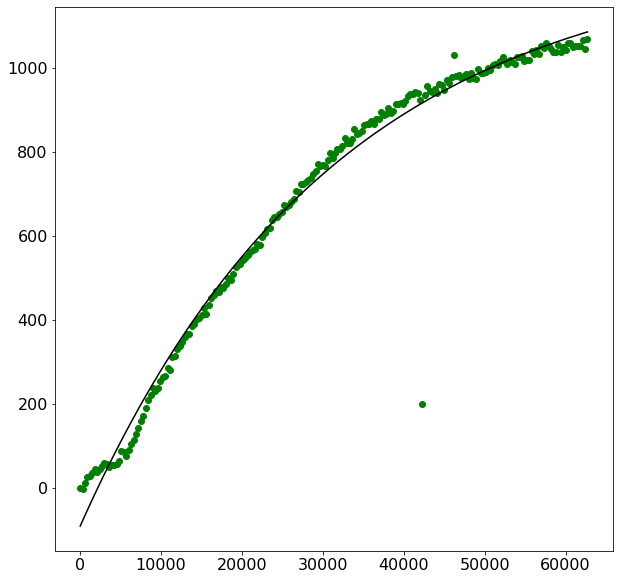

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 76
    # data points      = 210
    # variables        = 3
    chi-square         = 1279180.57
    reduced chi-square = 6179.61630
    Akaike info crit   = 1836.07077
    Bayesian info crit = 1846.11209
[[Variables]]
    amp:  977.209027 +/- 43.1886965 (4.42%) (init = 2)
    tau:  2.7615e-05 +/- 3.1341e-06 (11.35%) (init = 0)
    y0:   286.538530 +/- 19.2719652 (6.73%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, tau) = -0.843
    C(tau, y0)  = -0.722
    C(amp, y0)  =  0.268


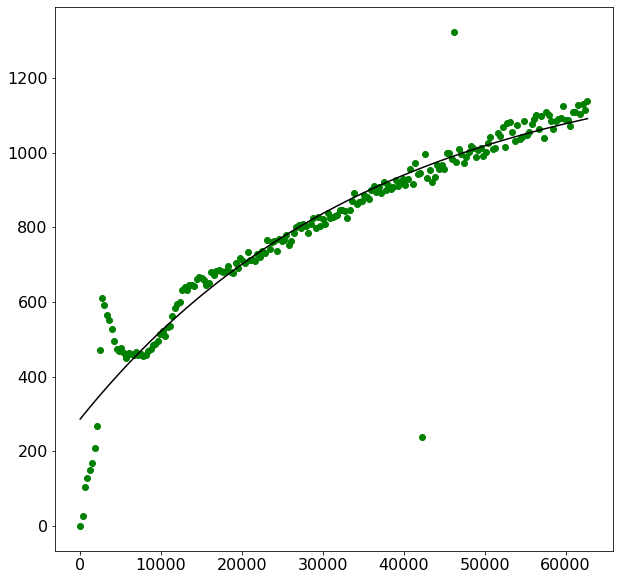

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 88
    # data points      = 210
    # variables        = 3
    chi-square         = 4352901.14
    reduced chi-square = 21028.5079
    Akaike info crit   = 2093.24157
    Bayesian info crit = 2103.28289
[[Variables]]
    amp:  1247.40455 +/- 61.3237283 (4.92%) (init = 2)
    tau:  1.6416e-04 +/- 1.3406e-05 (8.17%) (init = 0)
    y0:   301.514206 +/- 62.3925985 (20.69%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, y0)  = -0.979
    C(tau, y0)  = -0.682
    C(amp, tau) =  0.591


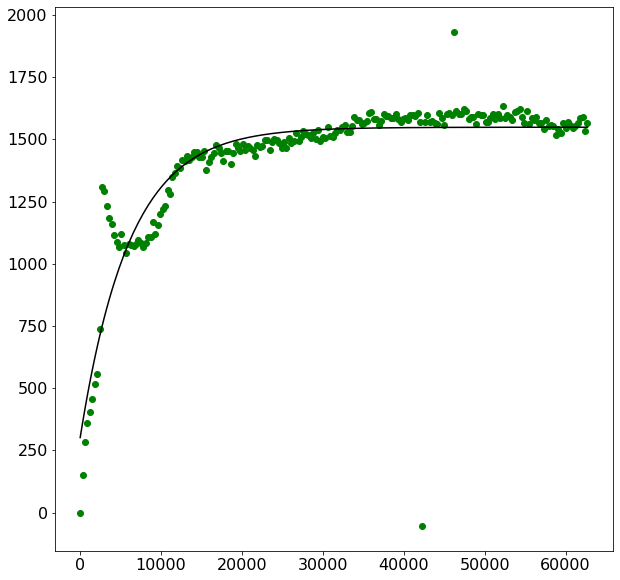

In [252]:
for p in profiles:
    pmax = np.max(p)
    p = list(p)
    inx = p.index(pmax)
    mod = Model(recovery)
    pars = mod.make_params(amp=2, tau = 0, y0 = 1)

    result = mod.fit(p, pars, x=time)

    print(result.fit_report())
    plt.plot(time, p, 'go', label = 'bleached')
    plt.plot(time, result.best_fit, 'k-', label='best fit')
    plt.show()

In [253]:
tau, e_tau = 0.00014, 0.0000043   ##change 
tau_m = np.log(0.5)/-tau
etau_m = np.log(0.5)*e_tau/-tau**2
D = 0.224*12**2/tau_m
e_D = 0.224*12**2*etau_m/tau_m**2
D, e_D

(0.006514979973448016, 0.00020010295632733198)

In [ ]:
D_list = [9.26, 13.82, 4.83, 6.60]
D_e = [0.007, 0.37, 0.69, 0.69]

angles = [81]
angles_e = [2]